# WeRateDogs - Act Report

## WeRateDog Data

The dataset that will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

WeRateDogs has over 4 million followers and has received international media coverage. The archived WeRateDog data contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

## Data Wraggling

Before we analyze the data, the dataset has already been cleaned. Please see the separate report titled 'wrangle_report' for details.

## Insights and Visualizations

### What is the most popular dog name?

In [3]:
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [24]:
df_dogs = pd.read_csv('twitter_archive_master.csv')

In [25]:
df_dogs_temp = df_dogs[df_dogs['name']!= 'None']

In [26]:
sns.set(rc={'figure.figsize':(12,8)})

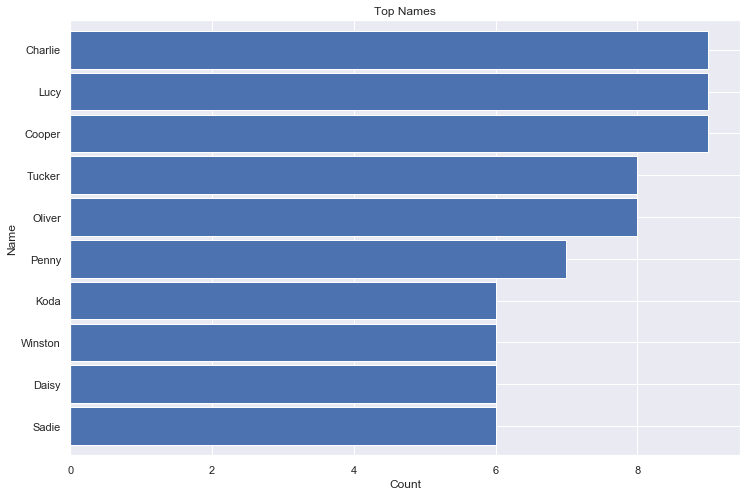

In [27]:
# Plot a bar chart to show top 10names

df_dogs_temp.name.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9)
plt.title('Top Names')
plt.ylabel('Name')
plt.xlabel('Count');

It is always interesting to see what gof owners like to call their pet, it looks like the Charlie, Lucy and Cooper are dog owners favorite names

### Is there a correlation between retweet count and favorite count?

Text(0.5, 1.0, 'Favorite vs Retweet Count')

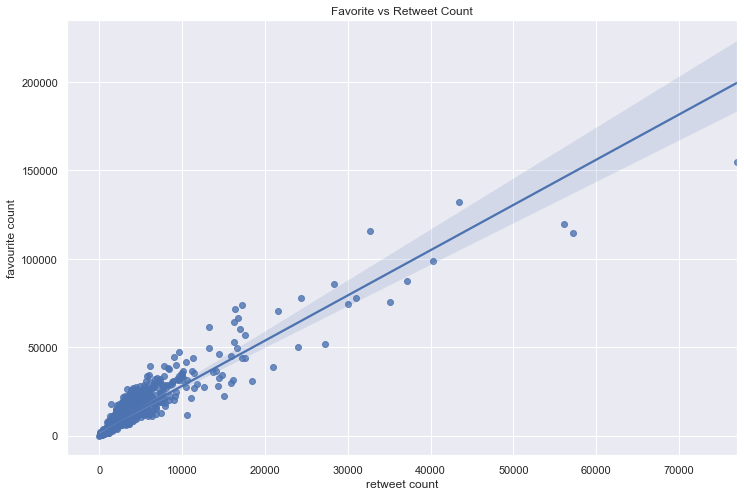

In [31]:
sns.regplot(
    x='retweets', 
    y='favorites', data=df_dogs)
plt.ylabel('favourite count')
plt.xlabel('retweet count');
plt.title('Favorite vs Retweet Count')

There is a clear positive correlation between the retweets and favourites, which seems to be expected.

### Which dog type gets the most tweets?

(-1.1988699250702628,
 1.1222127171106415,
 -1.1578316605255499,
 1.1027538939335808)

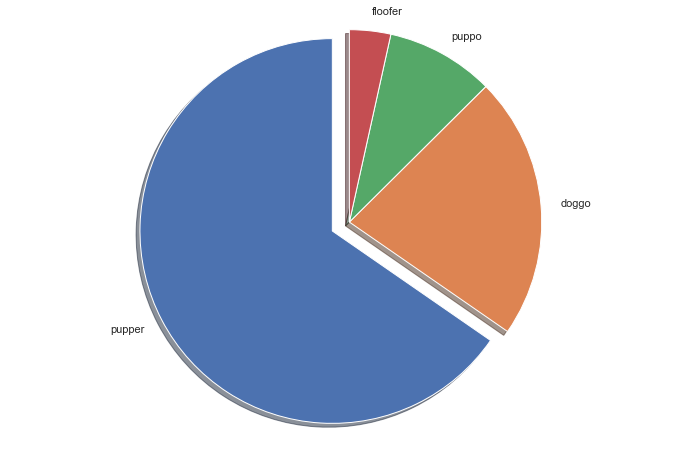

In [33]:
dog_type_count = list(df_dogs[df_dogs['dog_type'] != 'None']['dog_type'].value_counts())[0:4]
types = df_dogs[df_dogs['dog_type'] != 'None']['dog_type'].value_counts().index.tolist()[0:4]
explode = (0.1, 0, 0, 0) 

figure1, axis1 = plt.subplots()
plt.pie(dog_type_count, explode = explode, labels = types, shadow = True, startangle = 90)
plt.axis('equal')

Pupper gets more tweets which seems to be expected.

### Which prediction is more confident?

Text(0, 0.5, 'Confidence')

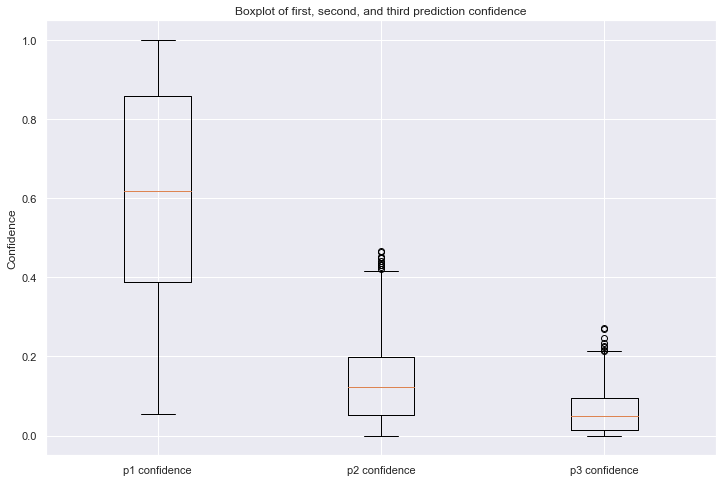

In [36]:
fig1, ax1 = plt.subplots()

plot =ax1.boxplot([
    df_dogs.p1_conf[df_dogs.p1_conf.notnull()],
    df_dogs.p2_conf[df_dogs.p2_conf.notnull()],
    df_dogs.p3_conf[df_dogs.p3_conf.notnull()]], 
    labels=[
    'p1 confidence', 'p2 confidence', 'p3 confidence'])
plt.title('Boxplot of first, second, and third prediction confidence')
plt.ylabel('Confidence')

The first prediction seems to have a higher confidence than the second and third prediction.

## Conclusion

Overall, I found this project is chanllenging but very fun. Interesting insights about how people see their dogs, and I have learnt a lot new skills.